# Pymaceuticals Inc.
---

### Analysis

- One observation that can be made is that the average tumor volume has a strong correlation to the weight of the mouse. As a result, any other statistics based on the tumor volume should be taken with consideration of the mouse involved, as it could otherwise appear that a medication used on a batch of larger mice was less effective than another medication used on a batch of smaller mice, when, in reality, the data only appears that way due to the differing proportions.

- Considering this first observation, it is hard to make conclusions based solely on the data relating to the volume of tumors. However, if we assume that each medication was tested on a group of mice with similar average weights, the data presented would suggest that Capomulin and Ramicane were especially effective in reducing the size of / mitigating growth in tumors. The graphs generated on individual mice using Capomulin, for the most part, support this conclusion - mostly showing a rapid drop-off in tumor volume after treatment began.

- At the extreme high, the two medications which reduce tumor volume the most also have the most timestamps recorded, indicating extensive testing OR that mice tended to last longer on the treatment. This trend does not continue downward, though, as the remainder of the medications seem to level out in number of timestamps, though the mean / median tumor volume varies.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID', how = 'left')

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_df['Mouse ID'].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe = mouse_study_df[mouse_study_df[['Mouse ID', 'Timepoint']].duplicated()]['Mouse ID']
dupe_ids = dupe.unique()
dupe_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID'] == dupe_ids[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df[mouse_study_df['Mouse ID'] != dupe_ids[0]]
cleaned_df.head()
    # If there were multiple duplicate IDs, could do it this way:
#cleaned_df = mouse_study_df
#for ID in dupe_ids:
#    cleaned_df = cleaned_df[cleaned_df['Mouse ID'] != ID]
#cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
group_df = cleaned_df.groupby('Drug Regimen')
mean_drug_df = group_df['Tumor Volume (mm3)'].mean(numeric_only = True)
med_drug_df = group_df['Tumor Volume (mm3)'].median(numeric_only = True)
var_drug_df = group_df['Tumor Volume (mm3)'].var(numeric_only = True)
std_drug_df = group_df['Tumor Volume (mm3)'].std(numeric_only = True)
err_drug_df = group_df['Tumor Volume (mm3)'].sem(numeric_only = True)
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean Tumor Volume': mean_drug_df,
                          'Median Tumor Volume': med_drug_df,
                          'Tumor Volume Variance': var_drug_df,
                          'Tumor Volume Std. Dev.': std_drug_df,
                          'Tumor Volume Std. Err.': err_drug_df})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df_2 = group_df.agg(
    {
        'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']
    }
)
summary_df_2

# version w/ column names
#group_df.agg(
#    Mean_Tumor_Volume = ('Tumor Volume (mm3)', 'mean'),
#    Median_Tumor_Volume = ('Tumor Volume (mm3)', 'median'),
#    Tumor_Volume_Variance = ('Tumor Volume (mm3)', 'var'),
#    Tumor_Volume_Std_Dev = ('Tumor Volume (mm3)', 'std'),
#    Tumor_Volume_Std_Err = ('Tumor Volume (mm3)', 'sem')
#)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

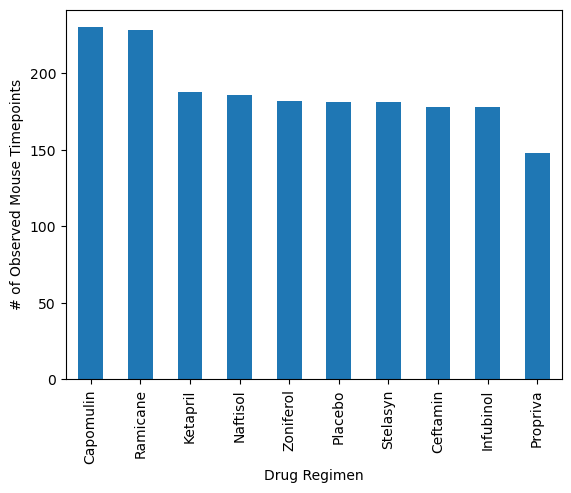

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# generate data
count_y = group_df['Timepoint'].count().sort_values(ascending = False)
count_x_tick = group_df['Timepoint'].count().sort_values(ascending = False).index
# plot
timepoint_plot = count_y.plot(kind='bar',
                              xlabel = 'Drug Regimen',
                              ylabel = '# of Observed Mouse Timepoints')
timepoint_plot.set_xticklabels(count_x_tick, rotation = 90)
timepoint_plot

Text(0, 0.5, '# of Observed Mouse Timepoints')

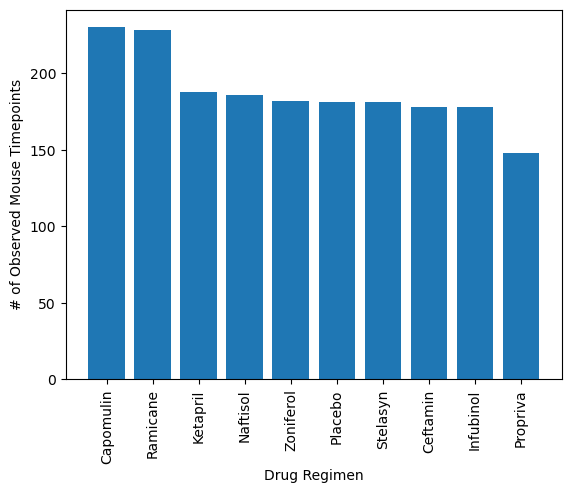

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# generate extra data
count_x = np.arange(len(count_y)) + 1
# plot
plt.bar(count_x, count_y)
plt.xticks(count_x, count_x_tick, rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

<Axes: ylabel='Sex'>

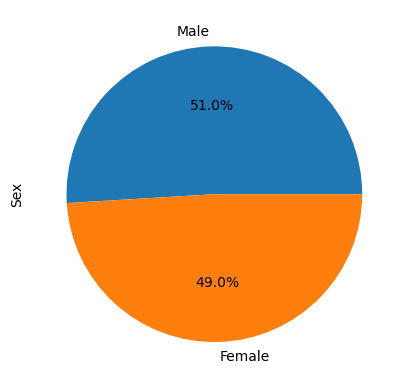

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# generate data
sex_group_df = cleaned_df.groupby('Sex')
sex_stats = sex_group_df['Mouse ID'].count().sort_values(ascending = False)
sex_plot = sex_stats.plot(kind = 'pie',
                          autopct = '%1.1f%%',
                          ylabel = 'Sex')
sex_plot

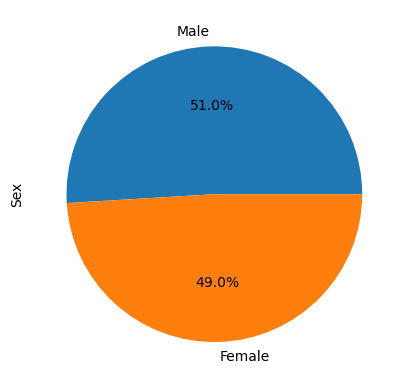

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_stats,
        labels = sex_stats.index,
        autopct = "%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_group_df = cleaned_df.groupby('Mouse ID')
final_time = max_group_df[['Timepoint']].max()
final_time.reset_index(inplace = True)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor = pd.merge(final_time, cleaned_df, on = ['Mouse ID', 'Timepoint'], how = 'left')
final_tumor

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for t in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    t_values = final_tumor[final_tumor['Drug Regimen'] == t][['Tumor Volume (mm3)']]
    # add subset 
    tumor_vol.append(t_values)

In [24]:
# Determine outliers using upper and lower bounds
for i in range(4):
    # get 1st & 3rd quartiles, and inter-quartile range
    up = tumor_vol[i]['Tumor Volume (mm3)'].quantile(.75)
    low = tumor_vol[i]['Tumor Volume (mm3)'].quantile(.25)
    iqr = up - low
    # find bounds, find and print outliers
    up_bound = up + iqr * 1.5
    low_bound = low - iqr * 1.5
    out_condition = (tumor_vol[i]['Tumor Volume (mm3)'] > up_bound) | (tumor_vol[i]['Tumor Volume (mm3)'] < low_bound)
    outliers = tumor_vol[i][out_condition]['Tumor Volume (mm3)']
    # print
    print(f"{treatments[i]}'s potential outliers: {outliers}")
    print(f"{treatments[i]}'s inter-quartile range: {round(iqr, 2)}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's inter-quartile range: 7.78
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's inter-quartile range: 9.1
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's inter-quartile range: 11.48
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's inter-quartile range: 15.58


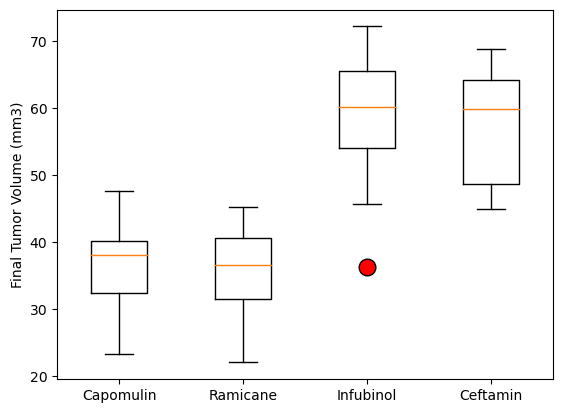

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(
    [
        tumor_vol[0]['Tumor Volume (mm3)'],
        tumor_vol[1]['Tumor Volume (mm3)'],
        tumor_vol[2]['Tumor Volume (mm3)'],
        tumor_vol[3]['Tumor Volume (mm3)']
    ], 
    flierprops=
    {
        'marker': 'o',
        'markersize': 12,
        'markerfacecolor': 'r'}
)
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], treatments)
plt.show()

## Line and Scatter Plots

In [33]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# get list of mice w/ Capomulin, pick a random one
cap_mice_f = final_tumor[final_tumor['Drug Regimen'] == 'Capomulin']
# not sure if there's a cleaner way to do this, basically grabbing a sample, then using values[0] to remove the index and make it a single value instead of an array
rand_mouse = cap_mice_f[['Mouse ID']].sample(1)
rand_mouse = rand_mouse['Mouse ID'].values[0]

# this line sets it to the mouse used in the example, was just used for reference
# rand_mouse = 'l509'

# get random mouse's data
rand_mouse_df = cleaned_df[cleaned_df['Mouse ID'] == rand_mouse][['Timepoint', 'Tumor Volume (mm3)']]
rand_mouse_df

,Timepoint,Tumor Volume (mm3)
231,0,45.000000
253,5,45.851193
539,10,46.759074
881,15,47.488599
982,20,48.070452
1146,25,44.006257
1414,30,44.708055
1499,35,40.207288
1723,40,40.770813
1771,45,41.483008


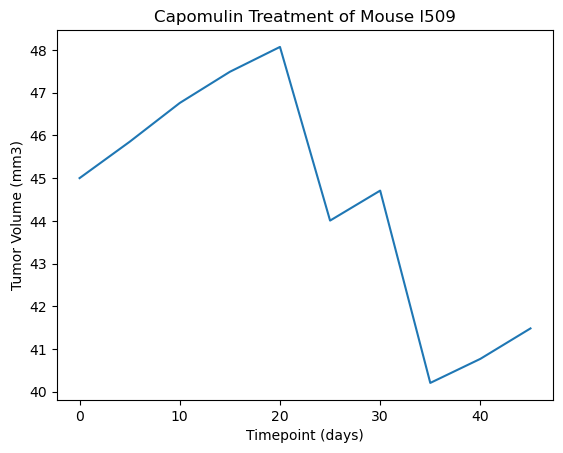

In [34]:
# actually plot data
rand_mouse_x = rand_mouse_df['Timepoint']
rand_mouse_y = rand_mouse_df['Tumor Volume (mm3)']
plt.plot(rand_mouse_x, rand_mouse_y)

# set labels / title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment of Mouse {rand_mouse}')

plt.show()

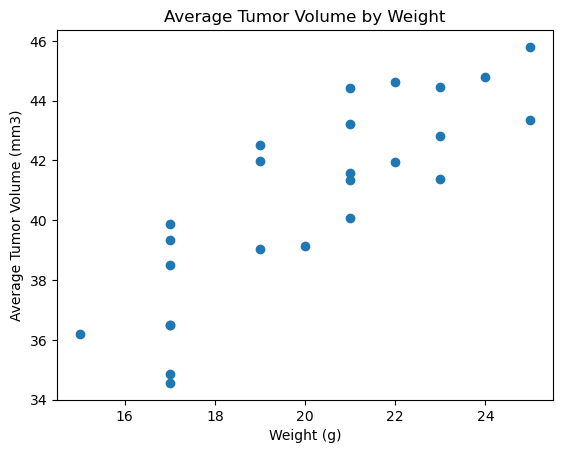

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# make a dataframe for all data using capomulin, then group by mice and average for data
cap_mice = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
cap_group_df = cap_mice.groupby('Mouse ID')
cap_avg_df = cap_group_df.mean(numeric_only = True)
# grab specific data
cap_weight_x = cap_avg_df['Weight (g)']
cap_weight_y = cap_avg_df['Tumor Volume (mm3)']
# plot
plt.scatter(cap_weight_x, cap_weight_y)
# labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


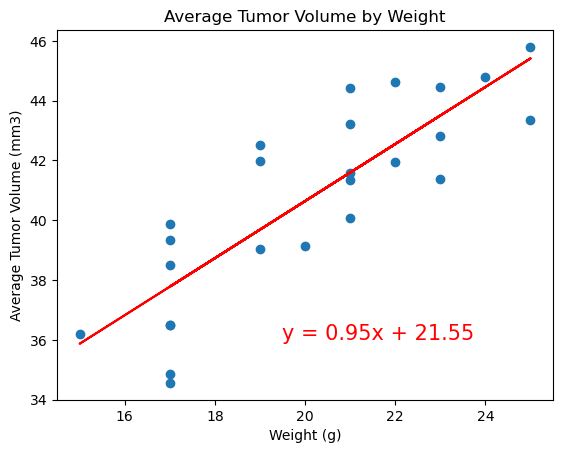

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# get correlation coefficient & print it pretty
cap_weight_corr = st.pearsonr(cap_weight_x, cap_weight_y)[0]
print(f'The correlation between mouse weight and the average tumor volume is {round(cap_weight_corr, 2)}.')
# get linreg segments
slope, intercept, rvalue, pvalue, stderr = st.linregress(cap_weight_x, cap_weight_y)
cap_weight_equation = f'y = {round(slope, 2)}x + {round(intercept, 2)}'
# get reg values
cap_weight_reg = cap_weight_x * slope + intercept

# plot scatter
plt.scatter(cap_weight_x, cap_weight_y)
# labels
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')

# plot line of regression
plt.plot(cap_weight_x, cap_weight_reg, 'r-')
plt.annotate(cap_weight_equation, (19.5, 36), fontsize = 15, c = 'r')

plt.show()